# Projekt 3 - Hemlisar

### Karim Kanji IA-20

# 1 - Skapa en ljudfil med numpy

### Imports

In [202]:
# Alla imports som behövs för projektet
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
from scipy.io.wavfile import write
import csv
import os
os.sys.path
from PIL import Image

### Skapa en ljudfil t.ex 1 sekund lång där du spelar ett C-accord.

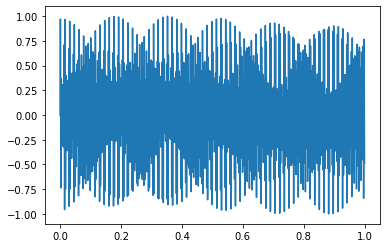

In [203]:
# Vi definierar sample raten och tiden för vårt ljud
sample_rate = 44100
duration = 1

# Vi skapar en array av tid värden
t = np.linspace(0, duration, duration * sample_rate)

# Här skapar vi tre sinus vågor för att slutligen skapa vårt C ackord
# Värdena får vi från:
# https://mixbutton.com/mixing-articles/music-note-to-frequency-chart/
c_note = np.sin(2 * np.pi * 261.63 * t)
e_note = np.sin(2 * np.pi * 329.63 * t)
g_note = np.sin(2 * np.pi * 392.00 * t)

# Här summerar vi sinus vågorna för att skapa C ackordet
chord = c_note + e_note + g_note

# Här normalizear vi amplituden av ackordet så att maximi värdet är 1
chord /= np.max(np.abs(chord))

# Här sparar vi ackordet i en .wav fil
write('c_chord.wav', sample_rate, chord)

# Här sparar vi tids axeln och ackord värdena i två skillda kolumner (arrays)
arrays = np.column_stack((np.array(t), np.array(chord)))

# Här sparar vi arrayn med "t" och "chord" som vi skapade i förra punkten i en csv fil
with open('chordInCSV.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(arrays)
csvfile.close()

# Här plottar vi ackordet
plt.plot(t, chord)
plt.show()

# 2. RGB komposition

In [204]:
# Läser in ursprungsbilden
image = img.imread("pokeEdited2.jpg")

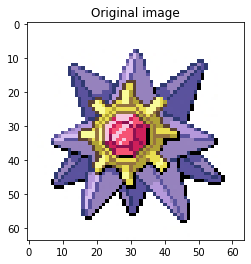

In [223]:
plt.title("Original image")
plt.imshow(image)

In [206]:
# Sparar bildens olika fär kanaler i egna variabler
red_channel = image[:,:,0]
green_channel = image[:,:,1]
blue_channel = image[:,:,2]

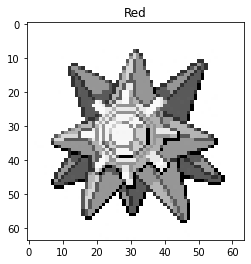

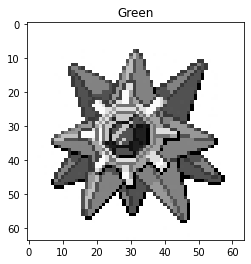

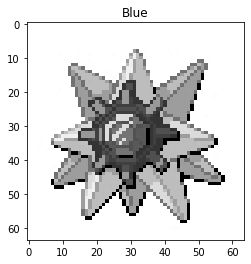

In [207]:
# Här visar vi röda kanalen
plt.imshow(red_channel, cmap="gray")
plt.title("Red")
plt.show()

# Här visar vi gröna kanalen
plt.imshow(green_channel, cmap="gray")
plt.title("Green")
plt.show()

# Här visar vi blåa kanalen
plt.imshow(blue_channel, cmap="gray")
plt.title("Blue")
plt.show()

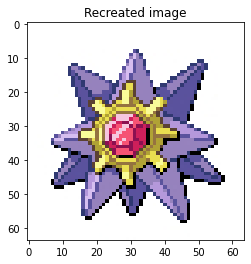

In [224]:
# Här kombinerar vi de skillda kanalerna för att återskapa den ursprungliga bilden
recreated_img = np.stack((red_channel, green_channel, blue_channel), axis=2)
plt.imshow(recreated_img)
plt.title("Recreated image")
plt.show()

In [209]:
# Här sparar vi den återskapade bilden
plt.imsave('RecreatedPokemon.png', recreated_img)

# 3. Göm information i bilder

In [210]:
# Vi läser in bildena som krävs, både fabio och bilden som innehåller det gömmda meddelandet
fabio = img.imread("fabio64.png")
message = img.imread("hiddenMessage.png")


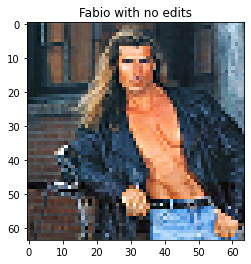

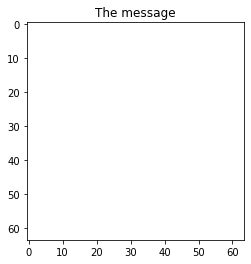

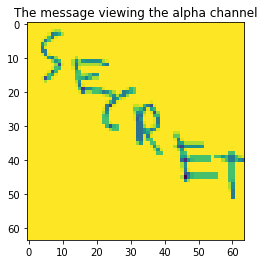

In [211]:
# Visar all information vi har
plt.imshow(fabio)
plt.title("Fabio with no edits")
plt.show()

# Det gömmda meddelandet syns såklart int på en vit canvas eftersom meddelandet är gömmt i ALPHA kanalen och är praktist
# taget omöjligt att se
plt.imshow(message)
plt.title("The message")
plt.show()

plt.imshow(message[:,:,3])
plt.title("The message viewing the alpha channel")
plt.show()

In [212]:
# Sparar de olika kanalerna i sina egna variabler, märk att eftersom vi vill addera alpha kanalen från vår bild
# som innehåller det gömmda meddelandet, sparar vi i alpha_ChannelMessage, meddelandets alpha värde och inte fabios
red_ChannelFabio = fabio[:,:,0]
green_ChannelFabio = fabio[:,:,1]
blue_ChannelFabio = fabio[:,:,2]

alpha_ChannelMessage = message[:,:,3]

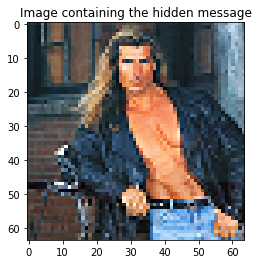

In [218]:
# Steganography: "The art of hiding messages inside an image"
# Här kombinerar vi röda, gröna och blåa kanalen från "Fabio" bilen med, alpha kanalen från "message" bilden
# för att skapa en bild som innehåller det dolda meddelandet
steganography = np.stack((red_ChannelFabio, green_ChannelFabio, blue_ChannelFabio, alpha_ChannelMessage), axis = 2)
plt.title("Image containing the hidden message")
plt.imshow(steganography)

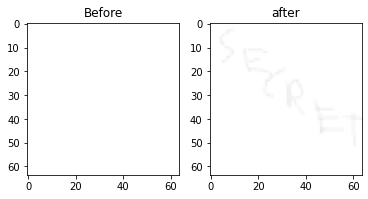

In [219]:
# Följande snutt är mitt sätt att bevisa att meddelandet faktist finns i bilden, märk att theHiddenMessage == steganographys 
# alpha kanal, alltså den vi har tweaka
theHiddenMessage = steganography[:,:,3]

fig = plt.figure()

#Subplot 1, märk här används Fabio bilden
fig.add_subplot(1,2,1)
plt.title("Before")
plt.imshow(fabio[:64,:64,3], cmap="gray", vmin = 0)

#Subplot 2, märk här används steganography bilden
fig.add_subplot(1,2,2)
plt.title("after")
plt.imshow(steganography[:64,:64,3], cmap="gray", vmin = 0)


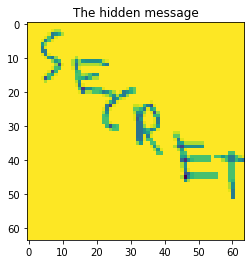

In [215]:
# Ännu en påminnelse av meddelandet i ursprungsformatet
plt.title("The hidden message")
plt.imshow(theHiddenMessage)

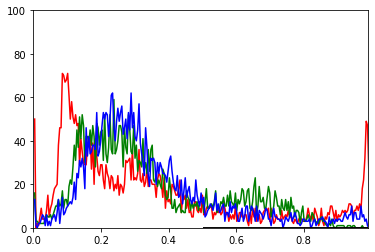

In [221]:
# Histogram 1, fabio
# Histogrammets olika färger, märk att alpha är definierad som svart
red_hist = np.histogram(fabio[:,:,0], bins=256)
green_hist = np.histogram(fabio[:,:,1], bins=256)
blue_hist = np.histogram(fabio[:,:,2], bins=256)
alpha_hist = np.histogram(fabio[:,:,3], bins=256)


# Visar själva histogrammet, märk att jag har användt ylim och xlim för att ge något vettigt att titta på
plt.plot(red_hist[1][1:], red_hist[0], color='red')
plt.plot(green_hist[1][1:], green_hist[0], color='green')
plt.plot(blue_hist[1][1:], blue_hist[0], color='blue')
plt.plot(alpha_hist[1][1:], alpha_hist[0], color='black')
plt.ylim(0, 100)
plt.xlim(0, 0.99)

plt.show()

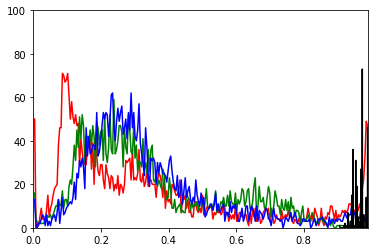

In [222]:
# Histogram 2, steganography
# Histogrammets olika färger, märk att alpha är definierad som svart
red_hist = np.histogram(steganography[:,:,0], bins=256)
green_hist = np.histogram(steganography[:,:,1], bins=256)
blue_hist = np.histogram(steganography[:,:,2], bins=256)
alpha_hist = np.histogram(steganography[:,:,3], bins=256)


# Visar själva histogrammet, märk att jag har användt ylim och xlim för att ge något vettigt att titta på
plt.plot(red_hist[1][1:], red_hist[0], color='red')
plt.plot(green_hist[1][1:], green_hist[0], color='green')
plt.plot(blue_hist[1][1:], blue_hist[0], color='blue')
plt.plot(alpha_hist[1][1:], alpha_hist[0], color='black')
plt.ylim(0, 100)
plt.xlim(0, 0.99)

plt.show()